In [1]:
import pandas as pd
import numpy as np
import env
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics


Answer with the type of test you would use (assume normal distribution):
- Is there a difference in grades of students on the second floor compared to grades of all students?
- Are adults who drink milk taller than adults who dont drink milk?
- Is the the price of gas higher in texas or in new mexico?
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [139]:

#stats.norm(mean, std).rvs(# samples)
office_1 = stats.norm(90, 15).rvs(40)
office_2 = stats.norm(100, 20).rvs(50)


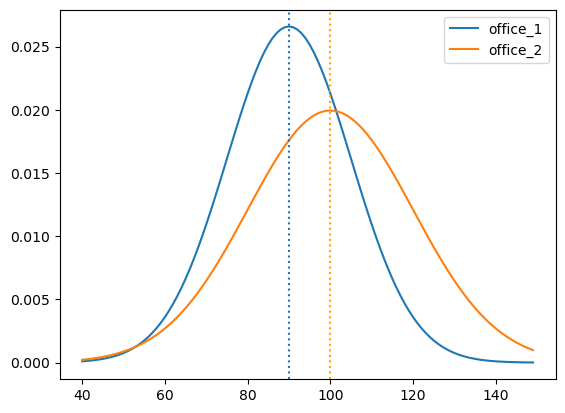

In [140]:
x= np.arange(40,150)

y1 = stats.norm(90,15).pdf(x) #this gives graph for office 1
y2 = stats.norm(100,20).pdf(x) #this gives graph for office 2

plt.plot(x, y1, label='office_1')
plt.plot(x,y2, label = 'office_2')
plt.axvline(90, ls=':')
plt.axvline(100, ls=':', color='orange')

plt.legend()
plt.show()


In [141]:
#let's get the average time to sell homes of office 1
avg_y1 = np.mean(y1)
avg_y1


0.009087128324877411

In [142]:
#let's get the average time to sell homes of office 2
avg_y2= np.mean(y2)
avg_y2


0.009019101164009186

In [143]:
alpha = 0.05

In [144]:
# to find sample size- must more than 30 to meet assumption
len(office_1), len(office_2)

(40, 50)

In [145]:
#this shows the variance is not the same. must set variance to false
y1.var(), y2.var()

(8.839047447475672e-05, 4.684978789008453e-05)

In [149]:
#we can also do a levene test
stat, p_val = stats.levene(office_1, office_2)

In [150]:
if p_val < 0.05:
    print('We can reject H0 ==> inequal variance')

In [152]:
# 2 sample. 2 tailed
t, p = stats.ttest_ind(office_1, office_2, equal_var=False)
t, p, alpha


(-2.878465060527964, 0.005015585512355948, 0.05)

In [153]:
p < alpha

True

In [154]:
if p < alpha:
    print('Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices')


Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices


In [155]:
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)
t, p


(-2.7091418459143854, 0.00811206270346016)

In [156]:
if p < alpha:
    print('Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices.')


Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices.


In [157]:
#import the data
mpg = data('mpg')


In [158]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [159]:
#find the mean of cty and hwy combined and create a new column
mpg['avg_fe'] = stats.hmean(mpg[['cty','hwy']], axis=1)


In [160]:
#look at our new data
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [161]:
#create new panda series for each year we are comparing
ninenine_fuel = mpg[mpg.year == 1999].avg_fe
oeight_fuel = mpg[mpg.year == 2008].avg_fe

<AxesSubplot:>

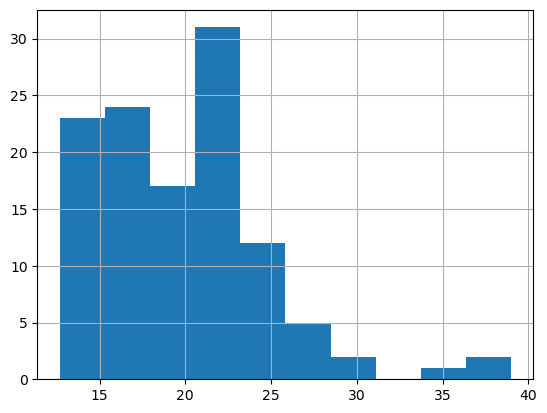

In [162]:
#Let's look at 1999's distribution
ninenine_fuel.hist()

<AxesSubplot:>

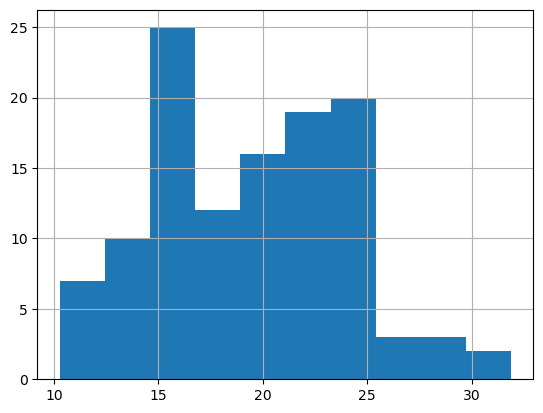

In [163]:
#Let's look at 2008's distribution
oeight_fuel.hist()


In [164]:
alpha = 0.05

In [165]:
# to find sample size- must more than 30 to meet assumption
ninenine_fuel.count(), oeight_fuel.count()

(117, 117)

In [167]:
stat, pval = stats.levene(ninenine_fuel, oeight_fuel)
if pval < alpha:
    print('we can reject the null hypothesis and posit that variance is inequal')


In [168]:
t, p = stats.ttest_ind(oeight_fuel, ninenine_fuel)
t,p, alpha

(-0.3011962975077886, 0.7635345888327115, 0.05)

In [169]:
p < alpha

False

In [170]:
print(f'''
Because p ({pval:.3f}) > alpha (.05), we fail to reject the null\
 hypothesis that there is no difference in fuel-efficency in cars\
 from 2008 and 1999.
''')


Because p (0.860) > alpha (.05), we fail to reject the null hypothesis that there is no difference in fuel-efficency in cars from 2008 and 1999.



In [171]:
#Let's create a dataset for only compact car mileage
fuel_compact = mpg[mpg['class'] == 'compact'].avg_fe

#Let's create a dataset for overall mileage
fuel_overall = mpg.avg_fe.mean()


(array([ 9., 13., 14.,  5.,  2.,  2.,  1.,  0.,  0.,  1.]),
 array([18.75      , 20.64642857, 22.54285714, 24.43928571, 26.33571429,
        28.23214286, 30.12857143, 32.025     , 33.92142857, 35.81785714,
        37.71428571]),
 <BarContainer object of 10 artists>)

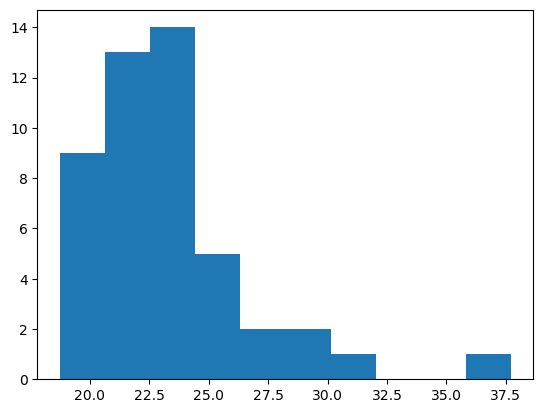

In [172]:
# look at the distribution. N >30
plt.hist(fuel_compact)


<AxesSubplot:>

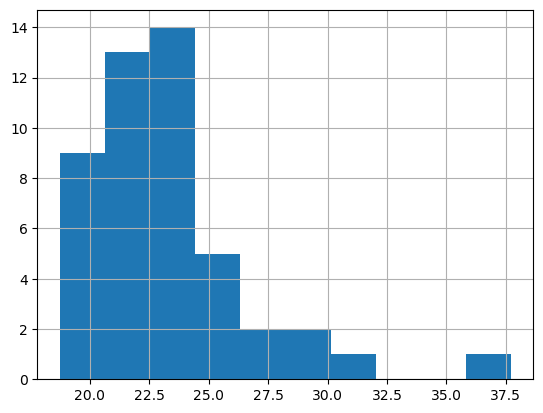

In [173]:
fuel_compact.hist()

In [174]:
t, p = stats.ttest_1samp(fuel_compact, fuel_overall)
t, p

(7.512360093161354, 1.5617666348807674e-09)

In [175]:
#must be more than 30
fuel_compact.count()


47

In [176]:
t, p = stats.ttest_1samp(fuel_compact, fuel_overall)
t,p

(7.512360093161354, 1.5617666348807674e-09)

In [178]:
if (t > 0) and ((p/2) < alpha):
    print('we can reject the null hypothesis')

we can reject the null hypothesis


In [179]:
print(f'''
Because p/2 ({p/2:.12f}) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.
''')



Because p/2 (0.000000000781) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.



In [180]:
# we will look at average fuel efficiency for auto cars, and manual cars
manual_fe = mpg[mpg.trans.str.contains('manual')].avg_fe
auto_fe = mpg[mpg.trans.str.contains('auto')].avg_fe


(array([ 6., 35., 27., 22., 33., 18.,  9.,  4.,  2.,  1.]),
 array([10.28571429, 12.65428571, 15.02285714, 17.39142857, 19.76      ,
        22.12857143, 24.49714286, 26.86571429, 29.23428571, 31.60285714,
        33.97142857]),
 <BarContainer object of 10 artists>)

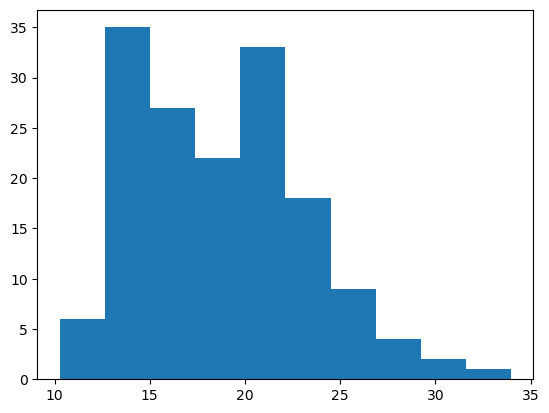

In [181]:
# look at the distribution. N >30
plt.hist(auto_fe)

In [182]:
#must be more than 30
auto_fe.count(), auto_fe.count()

(157, 157)

In [183]:
#check variance
auto_fe.var(), manual_fe.var()


(20.428279095002054, 25.665633639828275)

In [184]:
stats.levene(manual_fe, auto_fe)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [185]:
t, p = stats.ttest_ind(manual_fe, auto_fe, equal_var = False)
t,p

(4.47444321386703, 1.5980702702079528e-05)

In [187]:
if (t > 0) and ((p/2) < alpha):
    print('We can reject our null hypothesis')
else:
    print('we cannot reject our null hypothesis')


We can reject our null hypothesis


In [188]:
print(f'''
Because p/2 ({p/2:.6f}) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars
''')


Because p/2 (0.000008) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars



In [189]:
## just look at the means to visually confirm your decision
manual_fe.mean(), auto_fe.mean()


(21.629228592155194, 18.583199507835747)

^-- 21.63 is not the same as 18.58 SO... the null that there is NO difference in fuel economy is rejected


1. Answer with the type of stats test you would use (assume normal distribution):
 - Is there a relationship between the length of your arm and the length of your foot? Pearson's R or Spearman's
 - Do guys and gals quit their jobs at the same rate? independent T-Test (two-tailed)
 - Does the length of time of the lecture correlate with a students (numeric) grade? Pearson's R or Spearman's

2. Use the telco_churn data.
 - Does tenure correlate with monthly charges?
     - State hypothesis
     - select data
     - plot data
     - normality
     - run test
     - draw conclusions
 - Total charges?
 - What happens if you control for phone and internet service?

Does tenure correlate with monthly charges

- H_0: there is no LINEAR correlation between tenure and monthly cahrges
- H_a: there is a linear correlation between tenure and monthly charges

In [131]:
def get_db_url(username, password, host, db):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

url = get_db_url(env.username, env.password, env.host, db = 'telco_churn')


In [132]:
query = 'SELECT * FROM customers'

df = pd.read_sql(query, url)
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  7043 non-null   float64
 1   tenure           7043 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

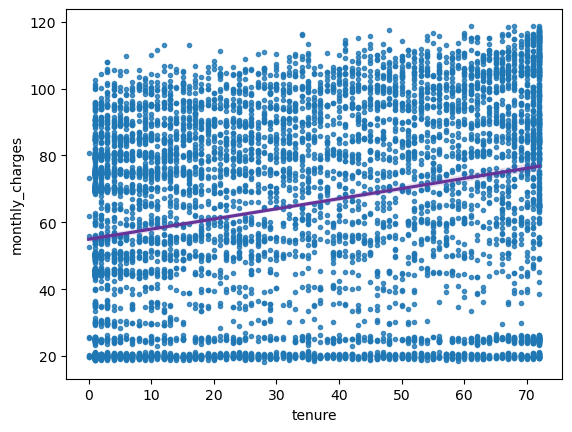

In [133]:
charges_df = df[['monthly_charges', 'tenure']]
charges_df.info()
sns.regplot(x = 'tenure', y = 'monthly_charges',
            data = charges_df, marker = '.', 
            line_kws = {'color': 'rebeccapurple'})

<AxesSubplot:>

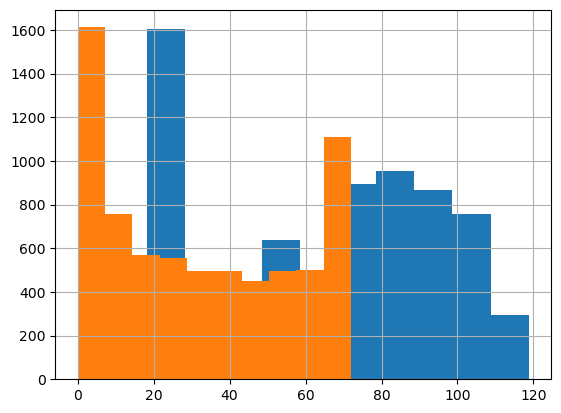

In [134]:
#distributions of the data to check for normalcy

charges_df.monthly_charges.hist()
charges_df.tenure.hist()

These distrtibutions are not normal, so we will use Spearman's test

In [135]:
alpha = 0.05
r, p = stats.spearmanr(charges_df.tenure, charges_df.monthly_charges)

In [103]:
def eval_result(alpha, p):
    if p < alpha:
        return(f' reject null hypothesis, there is a linear correlation', '(p-value: {p})')
    else: 
        return(f' we fail to reject null hypothesis, there is no linear correlation' '(p-value: {p})')

In [136]:
alpha = 0.05

ttl_charges_df = df[['tenure', 'total_charges']]
ttl_charges_df.info() #there is an issue

ttl_charges_df.total_charges.sort_values()

#convert empty space to zero

ttl_charges_df['total_charges'] = ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')

# confirm datatypes
ttl_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tenure         7043 non-null   int64 
 1   total_charges  7043 non-null   object
dtypes: int64(1), object(1)
memory usage: 110.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tenure         7043 non-null   int64  
 1   total_charges  7043 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


/var/folders/y6/7y_qk5sd3hq19wzg674k00bw0000gn/T/ipykernel_35404/3075964574.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttl_charges_df['total_charges'] = ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')


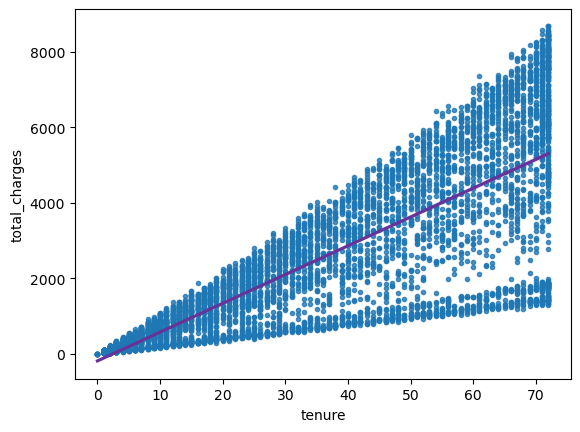

In [35]:
sns.regplot(x = 'tenure', y = 'total_charges', 
            data = ttl_charges_df, marker = '.', 
            line_kws = {'color': 'rebeccapurple'})
plt.show()

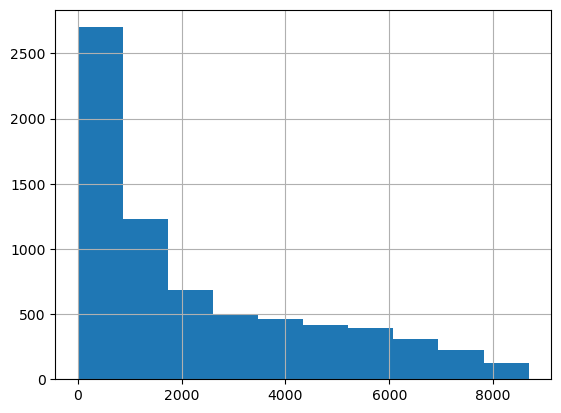

<AxesSubplot:>

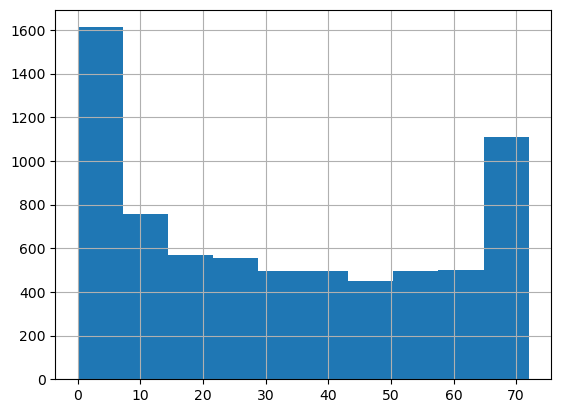

In [37]:
#check assumptions

ttl_charges_df.total_charges.hist()
plt.show()
ttl_charges_df.tenure.hist()

In [43]:
# run test
alpha = 0.05
r, p = stats.spearmanr(ttl_charges_df.tenure, ttl_charges_df.total_charges)
if p < alpha:
    print(f' Reject the null hypothesis. \
    there is no linear correlation between total charges and tenure\
    (p-value: {p})')
else: 
    print(f' we fail to reject null hypothesis that \
    there is a linear correlation between total charges and tenure\
    (p-value: {p})')

 Reject the null hypothesis.     there is no linear correlation between total charges and tenure    (p-value: 0.0)


Customers with phone and no internet
- State hypothesis
- select data
- plot data
- normality
- run test
- draw conclusions

of cutomers that only have phone service
H_0: there is no linear correaltion between tenure and monthly charges.
H_a: There is a linear correlation between tenure and monthly charges.



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           1739 non-null   int64  
 1   monthly_charges  1739 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


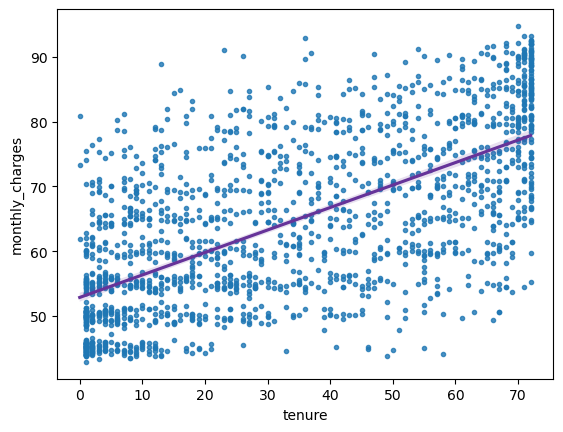

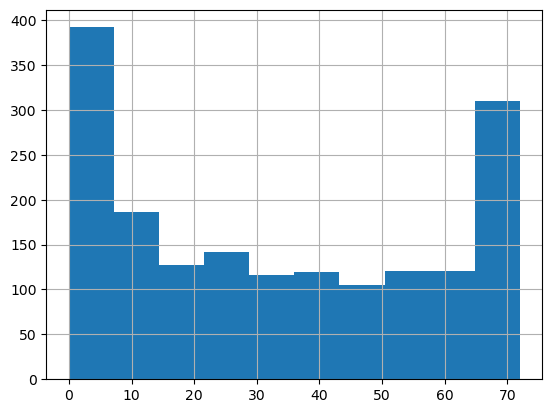

<function matplotlib.pyplot.show(close=None, block=None)>

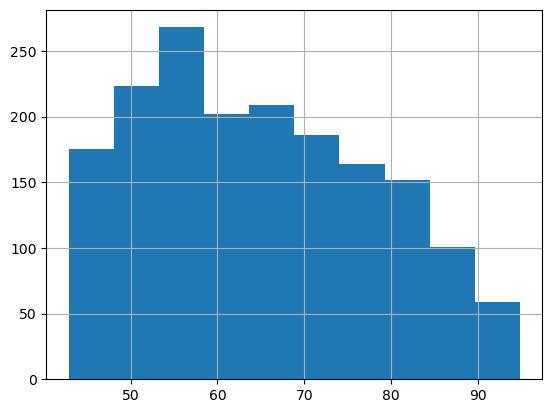

In [49]:
#set alpha
alpha = 0.05

#select data
phone_df = df[(df.phone_service == 'Yes') & (df.internet_service_type_id == 1)][['tenure', 'monthly_charges']]

#look at info
phone_df.info()

sns.regplot( x = 'tenure', y = 'monthly_charges', data = phone_df, marker = '.', line_kws = ({'color': 'rebeccapurple'}))
plt.show()

#check for normal dirstribution
phone_df.tenure.hist()
plt.show()

phone_df.monthly_charges.hist()
plt.show

Use spearman's due to violation of normalcy

In [96]:
r, p = stats.spearmanr(phone_df.tenure, phone_df.monthly_charges)

eval_result(alpha, p)
#print('r = ', r, 'p = ', p)

(' reject null hypothesis, there is no linear correlation', '(p-value: {p})')

3. Use the employees database.
 - Is there a relationship between how long an employee has been with the company and their salary?
 - 
 Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [81]:
url = get_db_url(env.username, env.password, env.host, db = 'employees')

query = '''
SELECT *
FROM employees
JOIN salaries USING (emp_no)
WHERE to_date = '9999-01-01';
'''

df = pd.read_sql(query, url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB


    - State hypothesis
    Is there a relationship between tenure and salary?
    H_0: no linear correlation
    H_a: linear correlation
     - select data
     - plot data
     - normality
     - run test
     - draw conclusions

<AxesSubplot:xlabel='tenure', ylabel='salary'>

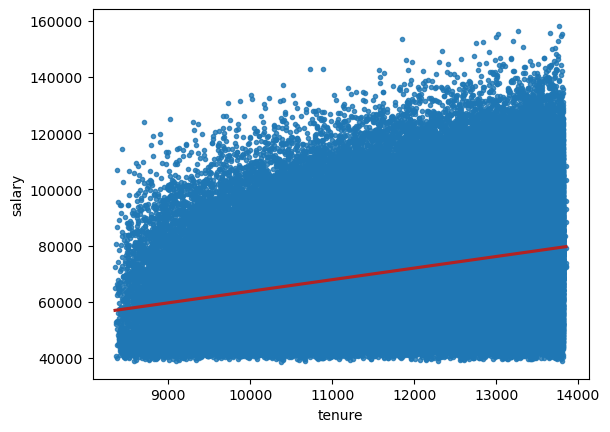

In [98]:
alpha = 0.05

df['tenure'] = pd.to_datetime('today') - pd.to_datetime(df.hire_date)
df['tenure'] = df.tenure.astype('str').str.split(' ', expand = True)[0].astype('int')

#df.info()

tenure_df = df[['tenure', 'salary']]
sns.regplot(x = 'tenure', y = 'salary', data = tenure_df, marker = '.', line_kws = ({'color': 'firebrick'}))

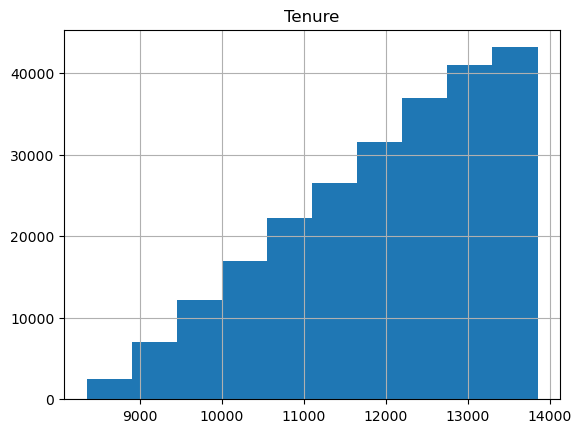

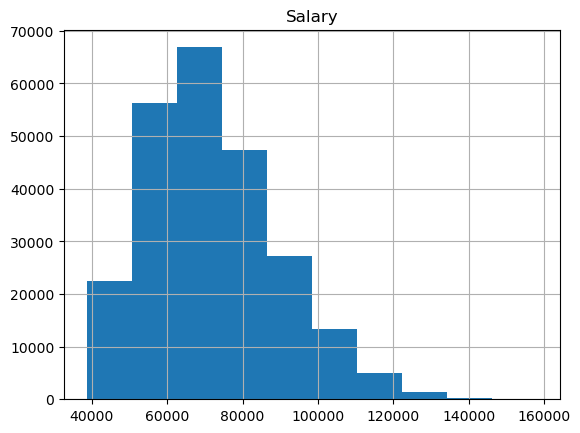

In [101]:
tenure_df.tenure.hist()
plt.title('Tenure')
plt.show()
tenure_df.salary.hist()
plt.title('Salary')
plt.show()

In [107]:
r, p = stats.spearmanr(tenure_df.tenure, tenure_df.salary)


eval_result(alpha, p)



(' reject null hypothesis, there is a linear correlation', '(p-value: {p})')

   - State hypothesis
    Is there a relationship between tenure and number of titles?
    H_0: no linear correlation
    H_a: linear correlation
     - select data
     - plot data
     - normality
     - run test
     - draw conclusions

In [114]:
alpha = 0.05

url = get_db_url(env.username, env.password, env.host, db = 'employees')

query = '''
SELECT t.emp_no, COUNT(t.title) AS num_titles, te.tenure
FROM titles t
JOIN (SELECT emp_no, datediff(now(), min(from_date)) AS tenure
FROM titles
GROUP BY emp_no
HAVING max(to_date) = '9999-01-01')
te USING (emp_no)
GROUP BY t.emp_no;
'''

df = pd.read_sql(query, url)
df.info()

<AxesSubplot:xlabel='tenure', ylabel='num_titles'>

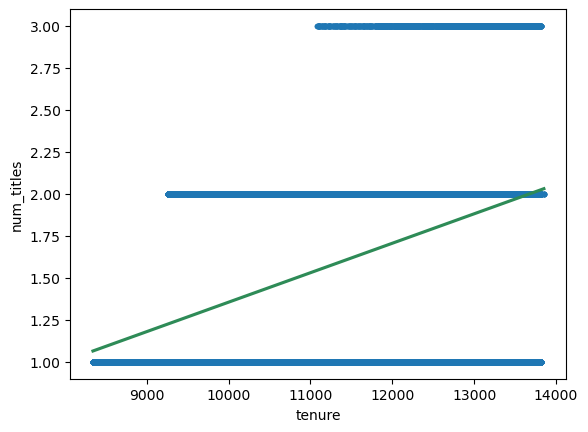

In [115]:
df = df[['num_titles', 'tenure']]

sns.regplot(x = 'tenure', y = 'num_titles', data = df, marker = '.', line_kws = ({'color': 'seagreen'}))

In [116]:
df.num_titles.value_counts()

2    125345
1    111892
3      2887
Name: num_titles, dtype: int64

In [118]:
stats.levene(df.num_titles, df.tenure)

LeveneResult(statistic=718602.1569097865, pvalue=0.0)

The variances are significantly different; tehrefore we will use the Kruskal Wallis test

In [119]:
stats.kruskal(df.num_titles, df.tenure)

KruskalResult(statistic=371488.64419334417, pvalue=0.0)

4. Use the sleepstudy data.
 - Is there a relationship between days and reaction time?

In [123]:
from pydataset import data
df = data('sleepstudy')


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

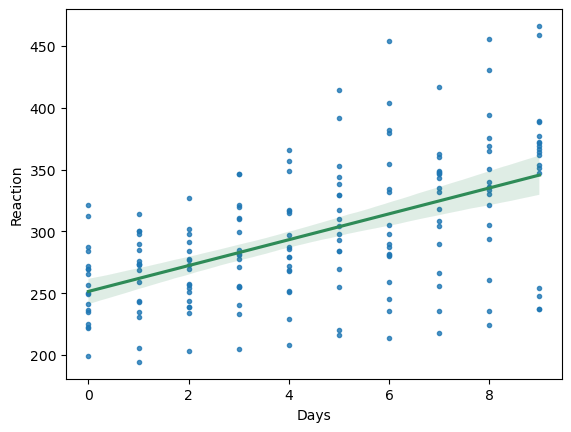

In [124]:
alpha = 0.05

df = df[['Reaction', 'Days']]



sns.regplot(x = 'Days', y = 'Reaction', data = df, marker = '.', line_kws = ({'color': 'seagreen'}))



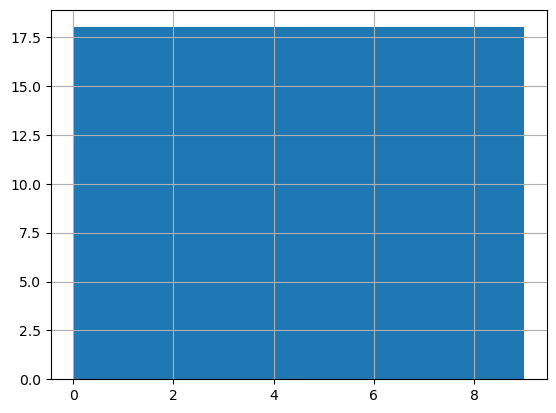

<AxesSubplot:>

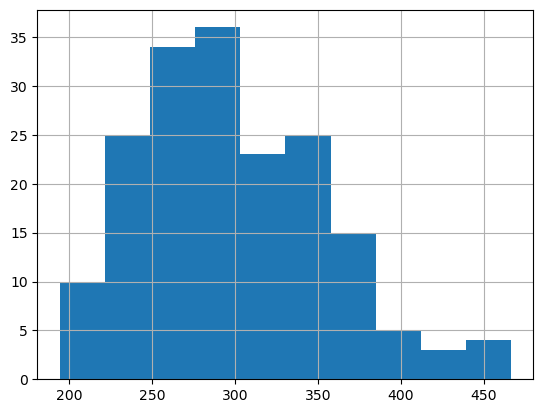

In [126]:
df.Days.hist()
plt.show()

df.Reaction.hist()

In [127]:
r, p = stats.spearmanr(df.Days, df.Reaction)
eval_result(alpha, p)

print('r_value: ', r)

r_value:  0.5228138502259547


1. Answer with the type of stats test you would use (assume normal distribution):

- Do students get better test grades if they have a rubber duck on their desk?
- Does smoking affect when or not someone has lung cancer?
- Is gender independent of a person’s blood type?
- A farming company wants to know if a new fertilizer has improved crop yield or not
- Does the length of time of the lecture correlate with a students grade?
- Do people with dogs live in apartments more than people with cats?

2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

 	                        Codeup Student	Not Codeup Student
        - Uses a Macbook	         49	           20
        - Doesn't Use A Macbook	   1               30

3. Choose another 2 categorical variables from the mpg dataset and perform a 
c
h
i
2
 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [192]:
mpg.head()

mpg['transmission'] = mpg.trans.str[:-4]
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,22.638298,auto
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,24.360000,manual
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,19.809524,auto
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,21.272727,manual


In [197]:
# H_0: Cylinders is independent of transmission type
# H_a: Cylinders is dependent of transmission type
n = mpg.shape[0]


transmission_proportions = mpg.transmission.value_counts() / n
transmission_proportions


auto      0.67094
manual    0.32906
Name: transmission, dtype: float64

In [199]:
cyl_proportions = mpg.cyl.value_counts() / n
cyl_proportions

4    0.346154
6    0.337607
8    0.299145
5    0.017094
Name: cyl, dtype: float64

In [200]:
expected = pd.DataFrame()

for transmission_group, t_prop in transmission_proportions.iteritems():
    for cyl_group, d_prop in cyl_proportions.iteritems():
        expected.loc[cyl_group, transmission_group] = t_prop * d_prop

expected.sort_index(inplace=True)
expected

,auto,manual
4,0.232249,0.113905
5,0.011469,0.005625
6,0.226514,0.111093
8,0.200709,0.098437


In [201]:
expected *= n
expected

,auto,manual
4,54.346154,26.653846
5,2.683761,1.316239
6,53.004274,25.995726
8,46.965812,23.034188


In [202]:
observed = pd.crosstab(mpg.cyl, mpg.transmission)
observed

transmission,auto,manual
cyl,,
4,41,40
5,2,2
6,56,23
8,58,12


In [203]:
chi2 = ((observed - expected)**2 / expected).values.sum()
chi2

18.88230458338151

In [204]:
nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

In [205]:
stats.chi2(degrees_of_freedom).sf(chi2)

#The p-value is less than alpha so we reject the null hypothesis

0.00028915357257799354

Did you mean:
Employment, Unemployment, Males, eagles, EmplUK, polyps, msleep, movies


4. Use the data from the employees database to answer these questions:

 - Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
 - Is an employee's gender independent of whether or not they are or have been a manager?

In [2]:
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'
query = '''
SELECT * FROM employees
JOIN dept_emp USING (emp_no)
JOIN departments USING (dept_no)
WHERE dept_emp.to_date LIKE '9999-01-01' 
AND departments.dept_name IN ('Sales', 'Marketing');
'''
info = pd.read_sql(query, url)

info

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d001,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,1993-08-03,9999-01-01,Marketing
1,d001,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13,1988-04-25,9999-01-01,Marketing
2,d001,10140,1957-03-11,Yucel,Auria,F,1991-03-14,1991-03-14,9999-01-01,Marketing
3,d001,10228,1953-04-21,Karoline,Cesareni,F,1991-08-26,1993-01-28,9999-01-01,Marketing
4,d001,10239,1955-03-31,Nikolaos,Llado,F,1995-05-08,1996-05-04,9999-01-01,Marketing
...,...,...,...,...,...,...,...,...,...,...
52538,d007,499966,1955-12-04,Mihalis,Crabtree,F,1985-06-13,1985-06-13,9999-01-01,Sales
52539,d007,499976,1963-08-20,Guozhong,Felder,M,1988-12-26,1988-12-26,9999-01-01,Sales
52540,d007,499980,1959-06-28,Gino,Usery,M,1991-02-11,1991-02-11,9999-01-01,Sales
52541,d007,499986,1952-07-22,Nathan,Ranta,F,1985-08-11,1985-08-11,9999-01-01,Sales


In [3]:
# H_0: Gender is independent of department
# H_a: Gender is dependent on department

n = info.shape[0]

gender_proportions = info.gender.value_counts() / n
gender_proportions

M    0.602935
F    0.397065
Name: gender, dtype: float64

In [4]:
department_proportions = info.dept_name.value_counts() / n
department_proportions

Sales        0.717527
Marketing    0.282473
Name: dept_name, dtype: float64

In [5]:
expected = pd.DataFrame()

for dept_group, t_prop in department_proportions.iteritems():
    for gender_group, d_prop in gender_proportions.iteritems():
        expected.loc[gender_group, dept_group] = t_prop * d_prop
        
expected.sort_index(inplace = True)
expected

,Sales,Marketing
F,0.284905,0.112160
M,0.432622,0.170313


In [6]:
observed = pd.crosstab(info.gender, info.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [7]:
expected *= n
expected

,Sales,Marketing
F,14969.757399,5893.242601
M,22731.242601,8948.757399


In [10]:
chi2 = ((observed - expected)**2 / expected).values.sum()
chi2

0.33540487836681343

In [8]:
nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

In [11]:
stats.chi2(degrees_of_freedom).sf(chi2)

0.5624936990655429

In [16]:
print('Given the evidence, gender is independent on whether an employee works in sales or marketing. \n\
Therefore we fail to reject the null hypothesis')

Given the evidence, gender is independent on whether an employee works in sales or marketing. 
Therefore we fail to reject the null hypothesis


# 4. b. Is an employee's gender independent of whether or not they are or have been a manager?

In [20]:
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'
query = '''
SELECT * FROM employees
JOIN titles USING (emp_no);
'''
g_manager = pd.read_sql(query, url)

g_manager

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


In [24]:
n = g_manager.shape[0]

g_proportions = g_manager.gender.value_counts() / n
g_proportions

M    0.600224
F    0.399776
Name: gender, dtype: float64

In [25]:
m_proportions = g_manager.title.value_counts() / n
m_proportions

Engineer              0.259420
Staff                 0.242249
Senior Engineer       0.220501
Senior Staff          0.209455
Technique Leader      0.034195
Assistant Engineer    0.034125
Manager               0.000054
Name: title, dtype: float64

In [26]:
expected = pd.DataFrame()

for gender_group, t_prop in g_proportions.iteritems():
    for manager_group, d_prop in m_proportions.iteritems():
        expected.loc[gender_group, manager_group] = t_prop * d_prop
        
expected.sort_index(inplace = True)
expected

,Engineer,Staff,Senior Engineer,Senior Staff,Technique Leader,Assistant Engineer,Manager
F,0.10371,0.096845,0.088151,0.083735,0.013670,0.013642,0.000022
M,0.15571,0.145404,0.132350,0.125720,0.020525,0.020483,0.000032


In [28]:
observed = pd.crosstab(g_manager.gender, g_manager.title)
observed

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
gender,,,,,,,
F,5952,46063,13,39141,37087,42854,6114
M,9176,68940,11,58609,55766,64537,9045


In [29]:
expected *= n
expected

,Engineer,Staff,Senior Engineer,Senior Staff,Technique Leader,Assistant Engineer,Manager
F,45975.465527,42932.368881,39078.126269,37120.422081,6060.207837,6047.814774,9.594629
M,69027.534473,64458.631119,58671.873731,55732.577919,9098.792163,9080.185226,14.405371


In [30]:
chi2 = ((observed - expected)**2 / expected).values.sum()
chi2

6.072856169573624

In [31]:
nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

In [32]:
stats.chi2(degrees_of_freedom).sf(chi2)

0.4150784130620944

In [37]:
manager_count = g_manager.title.value_counts()
manager_count

Engineer              115003
Staff                 107391
Senior Engineer        97750
Senior Staff           92853
Technique Leader       15159
Assistant Engineer     15128
Manager                   24
Name: title, dtype: int64

In [40]:
g_manager['is_manager'] = g_manager.title == 'Manager'
g_manager

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date,is_manager
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,False
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,False
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,False
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,False
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,False
...,...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29,False
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01,False
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01,False
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27,False


In [41]:
g_manager.is_manager.value_counts()

False    443284
True         24
Name: is_manager, dtype: int64

In [42]:
observed = pd.crosstab(g_manager.gender, g_manager.is_manager)
observed

is_manager,False,True
gender,,
F,177211,13
M,266073,11


In [43]:
m_proportions = g_manager.is_manager.value_counts() / n
m_proportions

False    0.999946
True     0.000054
Name: is_manager, dtype: float64

In [45]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [46]:
chi2 = ((observed - expected)**2 / expected).values.sum()
chi2

2.013774608457015

In [47]:
nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

In [48]:
stats.chi2(degrees_of_freedom).sf(chi2)

0.1558770742667552

In [49]:
print("There is not a significant relationship between gender and whether or not that person was or has been a manager. \n\
Therefore we fail to reject the null hypothesis")

There is not a significant relationship between gender and whether or not that person was or has been a manager. 
Therefore we fail to reject the null hypothesis
